# Perform Binary Classification to predict if Salary is greater than 50k

In [1]:
## First we import a basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Dataset

In [2]:
income=pd.read_csv("C://project1//income_evaluation.csv")
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
income.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
income.shape

(32561, 15)

### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
income[[ ' workclass', ' education',' marital-status', ' occupation',' relationship',' race', ' sex',
       ' capital-gain',' native-country', ' income']]=income[[ ' workclass', ' education',' marital-status', ' occupation',' relationship',' race', ' sex',
       ' capital-gain',' native-country', ' income']].apply(le.fit_transform)
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,25,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [8]:
income[" income"].value_counts()

0    24720
1     7841
Name:  income, dtype: int64

In [9]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    workclass       32561 non-null  int32
 2    fnlwgt          32561 non-null  int64
 3    education       32561 non-null  int32
 4    education-num   32561 non-null  int64
 5    marital-status  32561 non-null  int32
 6    occupation      32561 non-null  int32
 7    relationship    32561 non-null  int32
 8    race            32561 non-null  int32
 9    sex             32561 non-null  int32
 10   capital-gain    32561 non-null  int64
 11   capital-loss    32561 non-null  int64
 12   hours-per-week  32561 non-null  int64
 13   native-country  32561 non-null  int32
 14   income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


### Check Missing Value

In [10]:
income.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

## Data Visualization

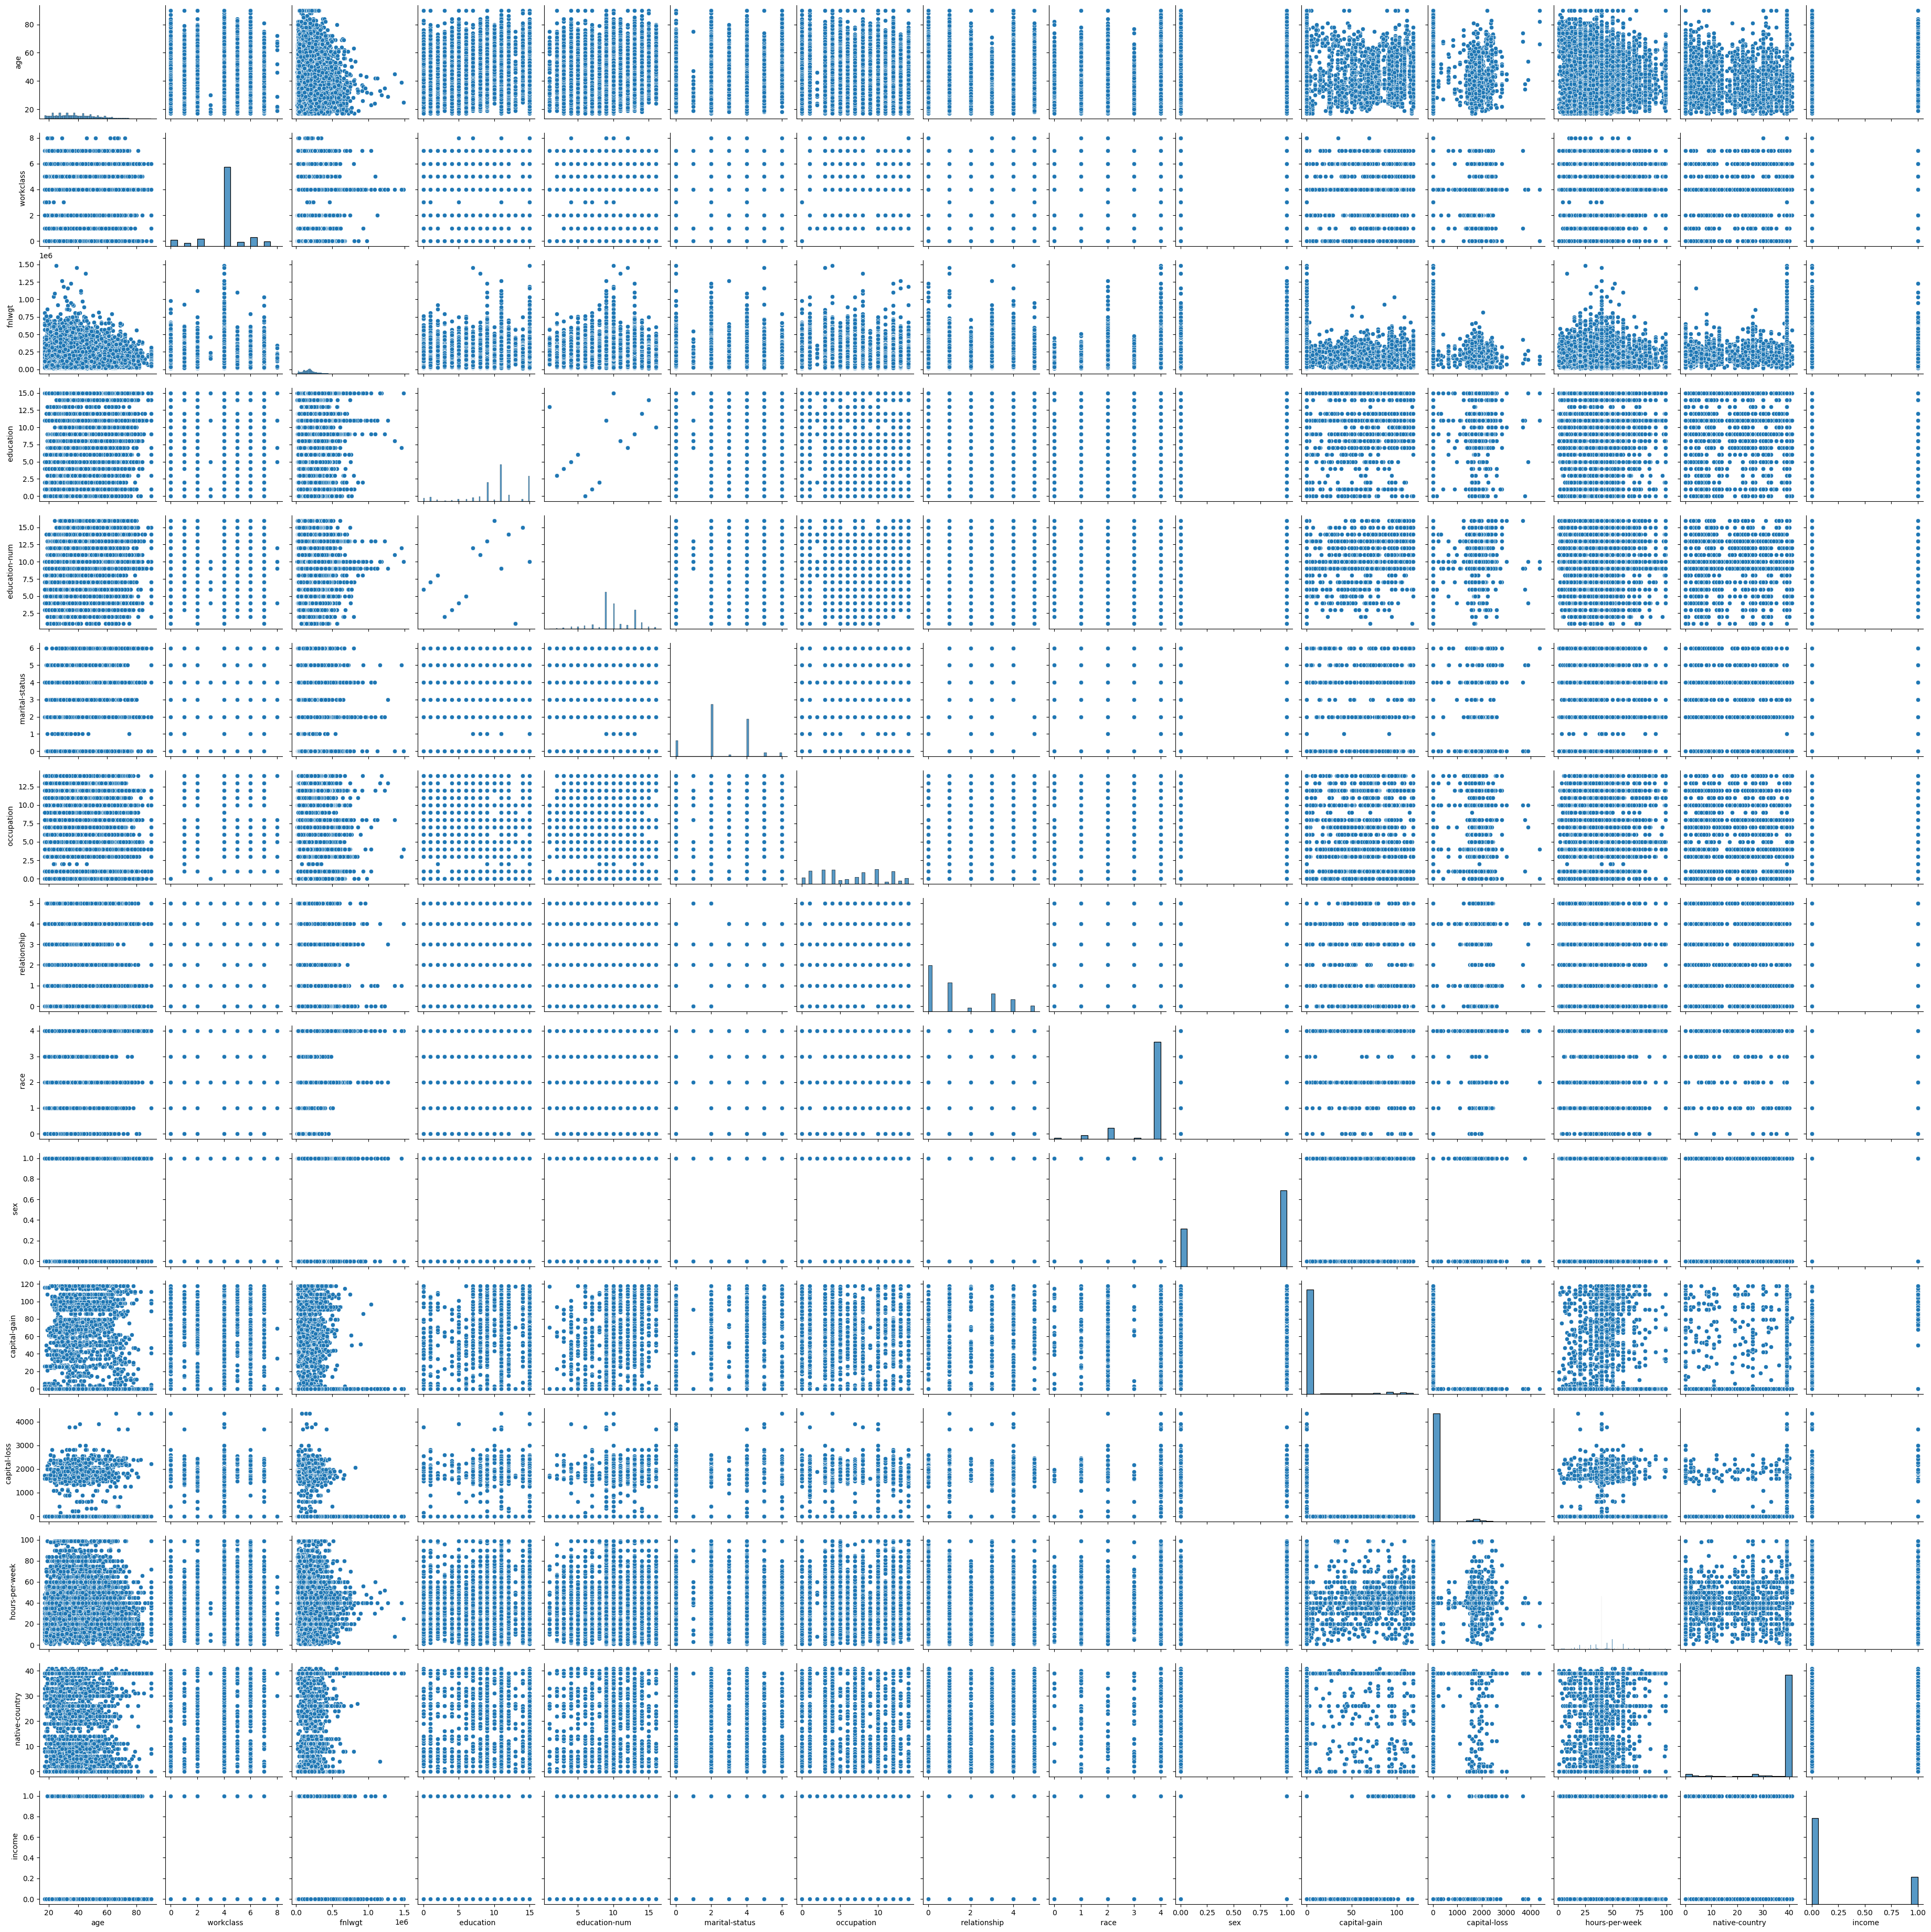

In [11]:
sns.pairplot(income)
plt.show()

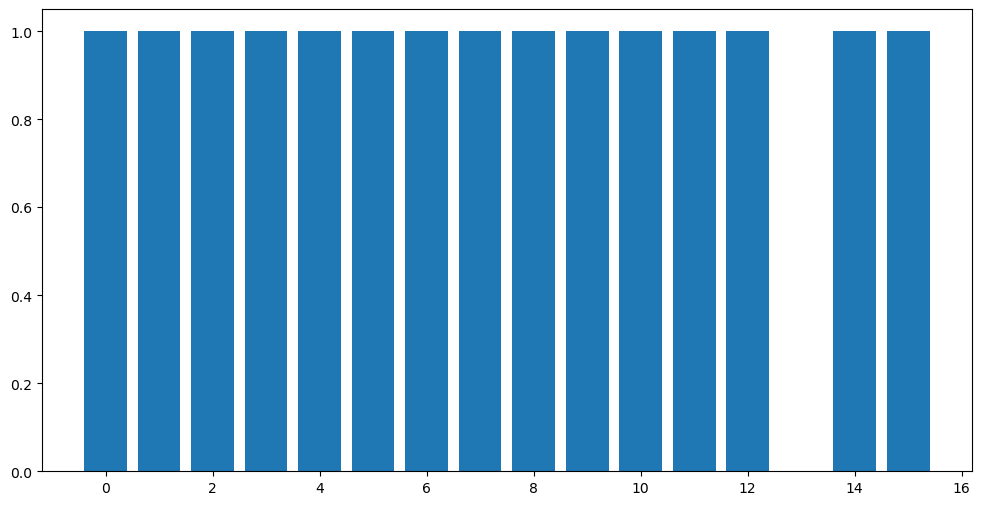

In [12]:
plt.figure(figsize=(12,6))
plt.bar(x=' education',height=" income",data=income)
plt.show()

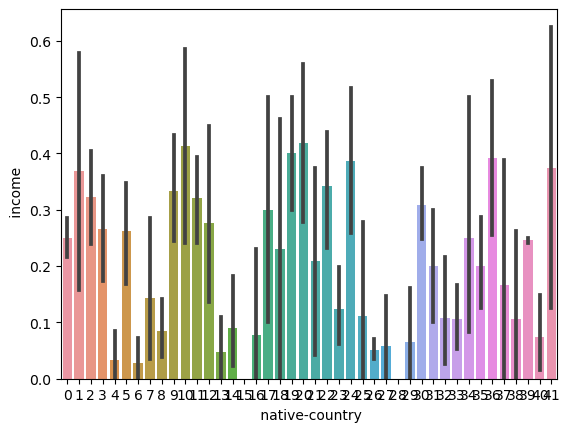

In [13]:
sns.barplot(x=" native-country",y=" income", data=income)
plt.show() 

In [ ]:
# Count of >50K & <=50K
sns.countplot(income[' income'],label="Count")

In [15]:
# Correlation matrix between numerical values
sns.heatmap(income.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

<AxesSubplot:>

In [ ]:
# Explore Education vs Income
g = sns.catplot(x=" education",y=" income",data=income,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [ ]:
# Explore Relationship vs Income
g = sns.catplot(x=" relationship",y=" income",data=income,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

### Using Different Classification Algorithms

### Import the needed libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [19]:
## Classification algorithm
models={"Logistic Regression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC(),
         "KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier()}

In [20]:
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [21]:
##Function to check which algorithm is best
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is ",model_name," with Accuracy ",high)

In [22]:
## Drop unnecessary column
income = income.drop(columns = [' education-num',' fnlwgt',' marital-status'])

In [23]:
##Rename the columns
income = income.rename(columns={" capital-gain":"capital_gain"," capital-loss":"capital_loss"," hours-per-week":"hours_per_week"," native-country":"native_country"," sex":"Gender"})

In [24]:
income.head(10)

,age,workclass,education,occupation,relationship,race,Gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,9,1,1,4,1,25,0,40,39,0
1,50,6,9,4,0,4,1,0,0,13,39,0
2,38,4,11,6,1,4,1,0,0,40,39,0
3,53,4,1,6,0,2,1,0,0,40,39,0
4,28,4,9,10,5,2,0,0,0,40,5,0
5,37,4,12,4,5,4,0,0,0,40,39,0
6,49,4,6,8,1,2,0,0,0,16,23,0
7,52,6,11,4,0,4,1,0,0,45,39,1
8,31,4,12,10,1,4,0,105,0,50,39,1
9,42,4,9,4,0,4,1,79,0,40,39,1


In [25]:
##Check unique value in the dataset
income.nunique()

age                73
 workclass          9
 education         16
 occupation        15
 relationship       6
 race               5
Gender              2
capital_gain      119
capital_loss       92
hours_per_week     94
native_country     42
 income             2
dtype: int64

In [26]:
##Split data 
x=income.drop(columns=" income")
y=income[" income"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
acc=modelAccuracy(models,x,y,0)

The Accuracy for  Logistic Regression  is : 0.7936434822662367
The Accuracy for  DecisionTreeClassifier  is : 0.8099186242898818
The Accuracy for  SVM  is : 0.8051589129433441
The Accuracy for  KNN  is : 0.8111469368954399
The Accuracy for  GNB  is : 0.7904191616766467
The Accuracy for  RandomForestClassifier  is : 0.8481498541378781
The Accuracy for  AdaBoostClassifier  is : 0.8564409642253954
The Accuracy for  GradientBoostingClassifier  is : 0.8598188238906802


In [29]:
## Check which classification algorithm give best accuracy
bestModel(acc)

Best model is  GradientBoostingClassifier  with Accuracy  0.8598188238906802


In [30]:
#Retraining The model using best parameters
lr=GradientBoostingClassifier()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [31]:
##Calculate accuracy as well as confusion matrix 
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

Accuracy is : 0.8598188238906802
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4918
           1       0.77      0.61      0.68      1595

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



<AxesSubplot:>

In [32]:
##Print the shape of train,test
print("shape of xtrain set is:",xtrain.shape)
print("shape of ytrain set is:",ytrain.shape)
print("shape of xtest set is:",xtest.shape)
print("shape of ytest set is:",ytest.shape)

shape of xtrain set is: (26048, 11)
shape of ytrain set is: (26048,)
shape of xtest set is: (6513, 11)
shape of ytest set is: (6513,)


In [33]:
##Check the actual Value and predicted value
data1=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
data1

,Actual,Predicted
22278,0,0
8950,0,0
7838,0,0
16505,0,1
19140,1,1
...,...,...
7694,1,1
10410,0,0
1043,1,1
30860,0,0


In [ ]:
##Input from User for testing the model
age=int(input('Enter the Age  :'))
workclass=int(input('Enter the workclass  :'))
education=int(input('Enter the education  :'))
occupation=int(input('Enter the occupation  :'))
relationship=int(input('Enter the relationship  :'))
race=int(input('Enter the race  :'))
Gender=int(input('Enter the gender  :'))
capital_gain=int(input('Enter the capital-gain  :'))
capital_loss=int(input('Enter the capital-loss  :'))
hours_per_week=int(input('Enter the hour per week  :'))
native_country=int(input('Enter the Native country  :'))

In [ ]:
New_Data = pd.DataFrame([[age,workclass,education,occupation,relationship,race,Gender,capital_gain,capital_loss,hours_per_week,native_country]],columns=['age', ' workclass', ' education', ' occupation', ' relationship',' race', 'Gender', 'capital_gain', 'capital_loss', 'hours_per_week','native_country'])
New_Data

In [ ]:
## Testing the model
New_ypred = lr.predict(New_Data)

In [ ]:
New_ypred

In [ ]:
##Create Pickle Model
import pickle

In [ ]:
pickle.dump(lr,open('income_evaluation_model.pkl','wb'))

In [ ]:
model=pickle.load(open('income_evaluation_model.pkl','rb'))